In [10]:
import cv2
import os
import glob
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.initializers import HeNormal
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications import MobileNetV2

# Reading in Data

In [11]:
folder_paths = ['Achaemenid architecture','American craftsman style', 'American Foursquare architecture', 
                'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 
                'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 
                'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 
                'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'International style', 
                'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 
                'Romanesque architecture' ]

In [12]:
file_jpg = glob.glob(f'../CSE_404_Project/**/{folder_paths[2]}/*.jpg', recursive=True)

In [13]:
X = []
y = []

dim = (256, 256)

for folder in folder_paths:
    file_jpg = glob.glob(f'../CSE_404_Project/**/{folder}/*.jpg', recursive=True)

    for i, f in enumerate(file_jpg):
        img = cv2.imread(f)
        img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = img.astype('float32') / 255.0
        X.append(img)
        y.append(folder)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=len(folder_paths))

# Splitting Training and Testing Data

In [14]:
y = [folder_paths.index(label) for label in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [15]:
len(X_train), len(X_test), len(X_valid)

(5167, 1615, 1292)

In [16]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

# Create and Train Neural Network

In [17]:
base_model = MobileNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(23, activation='softmax')
])

In [18]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.legacy.Adam(), metrics = ['accuracy'])

In [19]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_valid = np.asarray(X_valid)
y_valid = np.asarray(y_valid)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [20]:
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 11)

Epoch 1/11
162/162 [==============================] - 108s 653ms/step - loss: 2.0784 - accuracy: 0.3859 - val_loss: 1.5259 - val_accuracy: 0.5356
Epoch 2/11
162/162 [==============================] - 104s 643ms/step - loss: 1.4613 - accuracy: 0.5570 - val_loss: 1.3371 - val_accuracy: 0.5751
Epoch 3/11
162/162 [==============================] - 101s 625ms/step - loss: 1.2463 - accuracy: 0.6091 - val_loss: 1.2700 - val_accuracy: 0.6045
Epoch 4/11
162/162 [==============================] - 102s 633ms/step - loss: 1.0930 - accuracy: 0.6526 - val_loss: 1.2649 - val_accuracy: 0.5960
Epoch 5/11
162/162 [==============================] - 103s 638ms/step - loss: 0.9903 - accuracy: 0.6859 - val_loss: 1.2532 - val_accuracy: 0.6076
Epoch 6/11
162/162 [==============================] - 103s 635ms/step - loss: 0.8987 - accuracy: 0.7111 - val_loss: 1.2878 - val_accuracy: 0.6223
Epoch 7/11
162/162 [==============================] - 103s 637ms/step - loss: 0.8109 - accuracy: 0.7318 - val_loss: 1.2827 -

# Compare With Validation and Testing Data

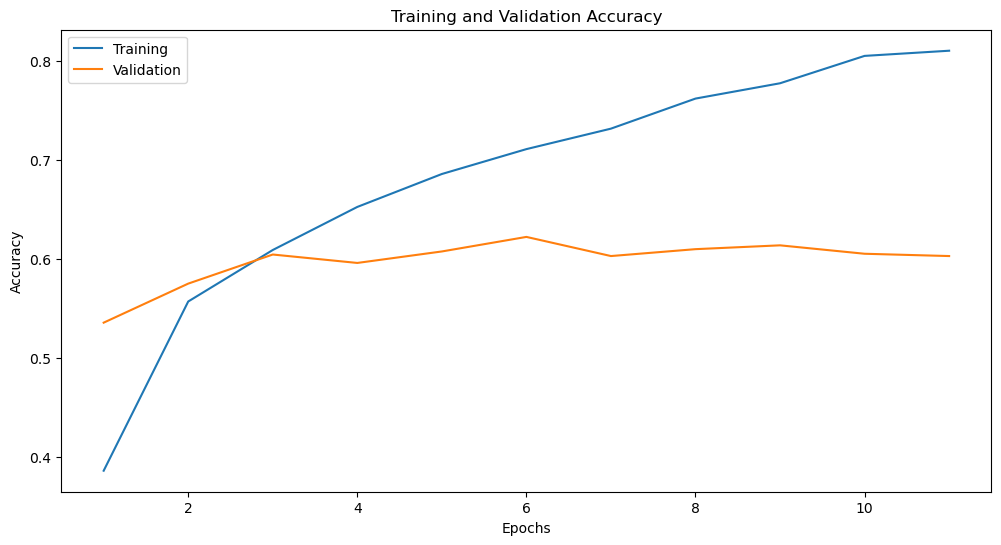

In [22]:
plt.figure(figsize = (12, 6))
train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 12)
sns.lineplot(x = epoch, y = train_loss, label = 'Training')
sns.lineplot(x = epoch, y = val_loss, label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [23]:
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=1)

print(y_pred)
print(y_test)

51/51 [==============================] - 24s 472ms/step
[ 8 15  8 ...  7 18 15]
[ 2 22  8 ... 20 18  6]


In [24]:
accuracy = np.mean(y_pred == y_test)
accuracy

0.5956656346749226

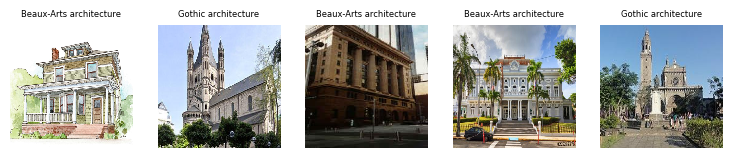

In [25]:
plt.figure(figsize=(9.2, 4.4))
for index, image in enumerate(X_test[:5]):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(folder_paths[y_pred[index]], fontsize=6)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

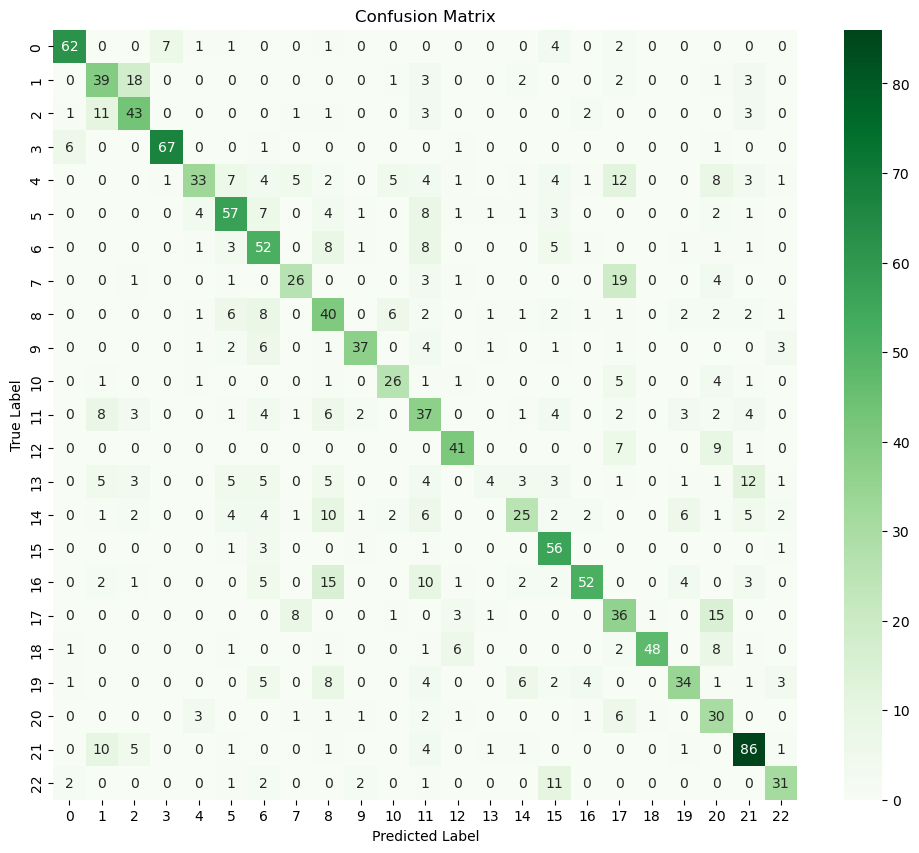

In [55]:


# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Greens", xticklabels=range(23), yticklabels=range(23))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Testing With Images of MSU

In [31]:
folder_path = 'MSU Designs'


X_MSU = []
dim = (256, 256)
folder_full_path = os.path.join('..', 'CSE_404_Project', folder_path)


file_list = [f for f in os.listdir(folder_full_path) if f.lower().endswith(('.jpg', '.jpeg', '.bmp'))]
for file_name in file_list:
    file_path = os.path.join(folder_full_path, file_name)

    img = cv2.imread(file_path)

    img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_array = img_rgb.astype('float32') / 255.0
            
    X_MSU.append(img_array)

X_MSU = np.array(X_MSU)

X_MSU.shape

(6, 256, 256, 3)

In [32]:
len(X_MSU)

6

In [33]:
X_MSU = np.asarray(X_MSU)
y_MSU_probs = model.predict(X_MSU)
y_predict_MSU = np.argmax(y_MSU_probs, axis=1)

1/1 [==============================] - 0s 181ms/step


In [34]:
y_predict_MSU

array([13, 20, 17,  1, 10, 17])

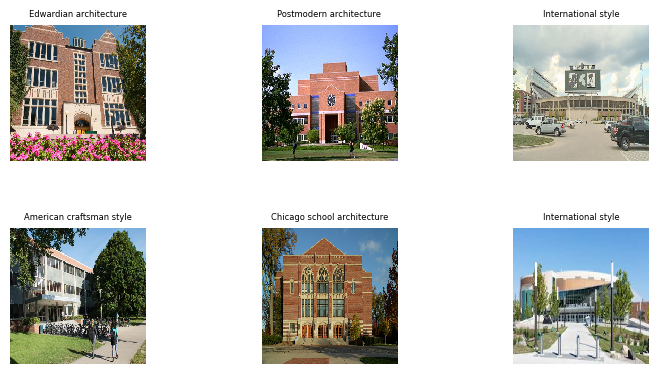

In [35]:
plt.figure(figsize=(9.2, 4.4))
for index, image in enumerate(X_MSU):
    plt.subplot(2, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(folder_paths[y_predict_MSU[index]], fontsize=6)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Baseline Model Comparison

In [44]:
base_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[256, 256, 3]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(70, activation='relu'),
    keras.layers.Dense(23, activation='softmax')
])

base_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.legacy.Adam(), 
              metrics = ['accuracy'])

In [45]:
base_model_history = base_model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 11)

Epoch 1/11
162/162 [==============================] - 34s 199ms/step - loss: 14.9157 - accuracy: 0.0532 - val_loss: 3.1304 - val_accuracy: 0.0728
Epoch 2/11
162/162 [==============================] - 17s 107ms/step - loss: 3.1294 - accuracy: 0.0776 - val_loss: 3.1277 - val_accuracy: 0.0735
Epoch 3/11
162/162 [==============================] - 16s 102ms/step - loss: 3.1238 - accuracy: 0.0776 - val_loss: 3.1239 - val_accuracy: 0.0735
Epoch 4/11
162/162 [==============================] - 16s 102ms/step - loss: 3.1191 - accuracy: 0.0776 - val_loss: 3.1210 - val_accuracy: 0.0735
Epoch 5/11
162/162 [==============================] - 14s 89ms/step - loss: 3.1154 - accuracy: 0.0776 - val_loss: 3.1192 - val_accuracy: 0.0735
Epoch 6/11
162/162 [==============================] - 16s 96ms/step - loss: 3.1127 - accuracy: 0.0776 - val_loss: 3.1180 - val_accuracy: 0.0735
Epoch 7/11
162/162 [==============================] - 15s 95ms/step - loss: 3.1107 - accuracy: 0.0776 - val_loss: 3.1174 - val_accu

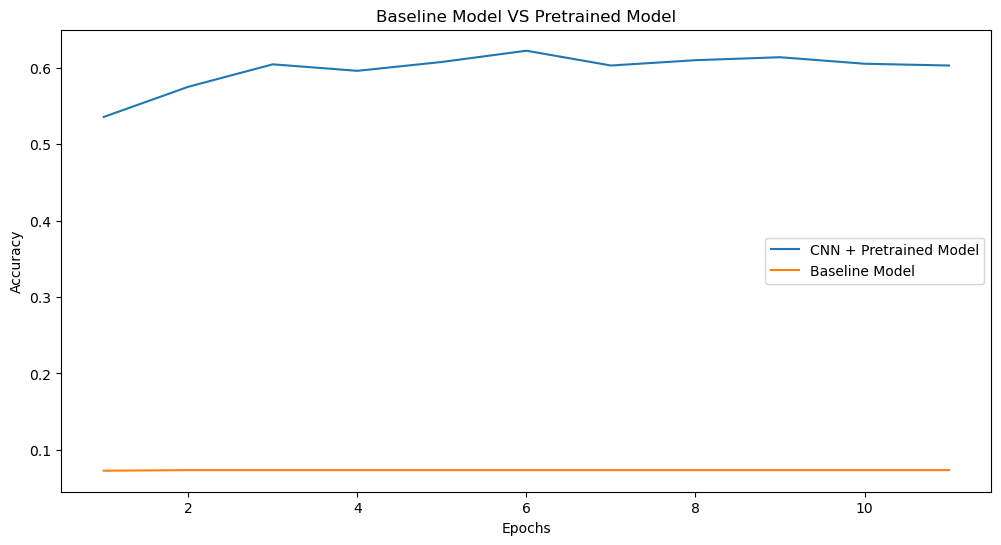

In [46]:
plt.figure(figsize = (12, 6))
val_model = model_history.history['val_accuracy']
val_base = base_model_history.history['val_accuracy'] 
epoch = range(1, 12)
sns.lineplot(x = epoch, y = val_model, label = 'CNN + Pretrained Model')
sns.lineplot(x = epoch, y = val_base, label = 'Baseline Model')
plt.title('Baseline Model VS Pretrained Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

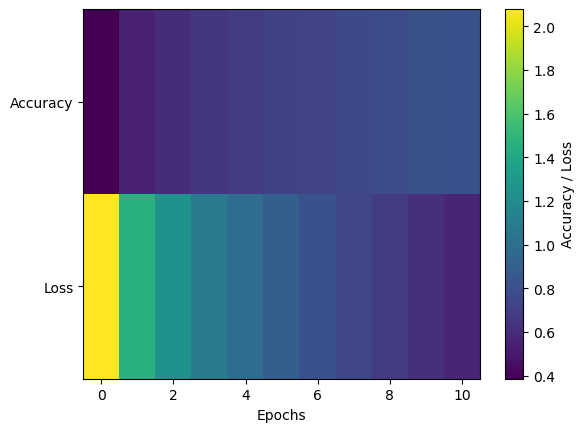

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a model_history object with accuracy and loss values
# For example, model_history = model.fit(...)

# Extract accuracy and loss values
accuracy = model_history.history['accuracy']
loss = model_history.history['loss']

# Create a 2D array with accuracy and loss values
heatmap_data = np.array([accuracy, loss])

# Create a heatmap
plt.imshow(heatmap_data, cmap='viridis', aspect='auto')

# Add labels and colorbar
plt.colorbar(label='Accuracy / Loss')
plt.xlabel('Epochs')
plt.yticks([0, 1], ['Accuracy', 'Loss'])

# Show the plot
plt.show()